<a href="https://colab.research.google.com/github/VasantiP/fastai/blob/main/bunny_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bunny classifier

In [2]:
#!export
from fastai.vision.all import *
import gradio as gr

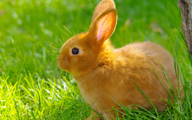

In [6]:
im = PILImage.create('bunny.jpg')
im.thumbnail((192,192))
im

In [7]:
#!export
learn = load_learner('bunny-model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
%time learn.predict(im)

In [ ]:
#!export
categories = ('bunny', 'llama')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [ ]:
classify_image(im)

In [ ]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['bunny.jpg', 'llama.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)